In [327]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [328]:
train_set = pd.read_csv('titanic/train.csv')
test_set = pd.read_csv('titanic/test.csv')

In [329]:
train_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [330]:
test_set.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [331]:
test_set = test_set.drop(['Name','Ticket','Cabin'],axis=1)

### Get info about the dataset

In [332]:
train_set.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [333]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [334]:
train_set['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
F2             3
C22 C26        3
F33            3
D              3
E101           3
F G73          2
E44            2
D35            2
B58 B60        2
D33            2
C78            2
F4             2
E121           2
D20            2
B35            2
C52            2
C2             2
C65            2
E24            2
B49            2
D36            2
C125           2
C68            2
B28            2
E25            2
C123           2
C83            2
              ..
B82 B84        1
B86            1
B3             1
E49            1
C45            1
A34            1
D21            1
D37            1
C101           1
D10 D12        1
C103           1
D56            1
D28            1
C86            1
C106           1
A23            1
A6             1
C118           1
D46            1
F E69          1
B4             1
B19            1
E17            1
E34            1
E12            1
C128           1
F G63          1
D19           

### Drop irrelevant features

In [335]:
train_set.drop('Cabin',axis=1,inplace=True)

In [336]:
train_set.drop('Ticket',axis=1,inplace=True)

### Visualize data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000170317DCCF8>,
      dtype=object)

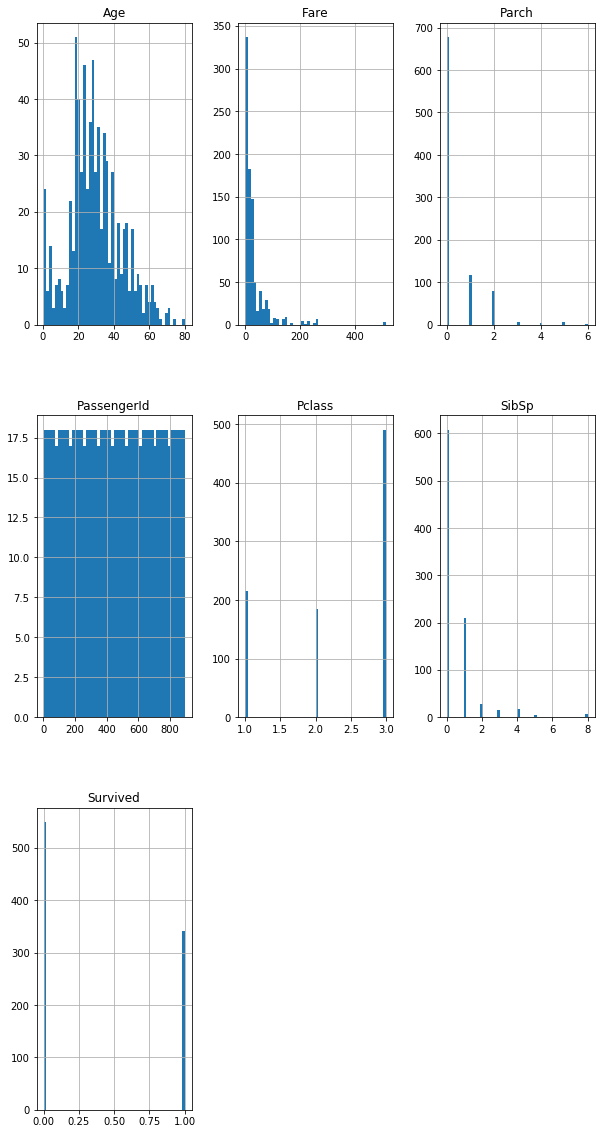

In [337]:
train_set.hist(figsize=(10,20),bins=50)

### Create new feature that indicates if a person was alone in the ship

In [338]:
def create_is_alone_feature(row):
    if row['SibSp'] == 0 and row['Parch'] == 0:
        return 1
    else:
        return 0

In [339]:
train_set['is_alone'] = train_set.apply(create_is_alone_feature,axis=1)

In [340]:
test_set['is_alone'] = test_set.apply(create_is_alone_feature,axis=1)

In [341]:
test_set.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,is_alone
0,892,3,male,34.5,0,0,7.8292,Q,1
1,893,3,female,47.0,1,0,7.0000,S,0
2,894,2,male,62.0,0,0,9.6875,Q,1
3,895,3,male,27.0,0,0,8.6625,S,1
4,896,3,female,22.0,1,1,12.2875,S,0


In [342]:
train_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,is_alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [343]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       889 non-null object
is_alone       891 non-null int64
dtypes: float64(2), int64(6), object(3)
memory usage: 76.6+ KB


In [344]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           417 non-null float64
Embarked       418 non-null object
is_alone       418 non-null int64
dtypes: float64(2), int64(5), object(2)
memory usage: 29.5+ KB


In [345]:
passenger_ids = test_set['PassengerId']

In [346]:
test_set.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,is_alone
0,892,3,male,34.5,0,0,7.8292,Q,1
1,893,3,female,47.0,1,0,7.0000,S,0
2,894,2,male,62.0,0,0,9.6875,Q,1
3,895,3,male,27.0,0,0,8.6625,S,1
4,896,3,female,22.0,1,1,12.2875,S,0


In [264]:
train_set.dropna(subset=['Embarked'],axis=0,inplace=True)

In [265]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            712 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Fare           889 non-null float64
Embarked       889 non-null object
is_alone       889 non-null int64
dtypes: float64(2), int64(6), object(3)
memory usage: 83.3+ KB


In [266]:
train_set_num = train_set[['Age','SibSp','Parch','Fare']]
train_set_cat = train_set[['Pclass','Sex','Embarked','is_alone']]
labels = train_set['Survived']

In [347]:
test_set_num = test_set[['Age','SibSp','Parch','Fare']]
test_set_cat = test_set[['Pclass','Sex','Embarked','is_alone']]

### Use SimpleImputer to fill missing features

In [268]:
from sklearn.impute import SimpleImputer

In [269]:
imputer = SimpleImputer(strategy='median')

In [270]:
imputer.fit(train_set_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [271]:
X = imputer.transform(train_set_num)

In [348]:
X_test = imputer.transform(test_set_num)

In [273]:
X_df = pd.DataFrame(X, columns=train_set_num.columns,
                          index = list(train_set.index.values))

In [349]:
X_test_df = pd.DataFrame(X_test, columns=test_set_num.columns,
                          index = list(test_set.index.values))

In [350]:
X_df.head()

,Age,SibSp,Parch,Fare
0,-0.563674,0.431350,-0.474326,-0.500240
1,0.669217,0.431350,-0.474326,0.788947
2,-0.255451,-0.475199,-0.474326,-0.486650
3,0.438050,0.431350,-0.474326,0.422861
4,0.438050,-0.475199,-0.474326,-0.484133


In [351]:
X_test_df.head()

,Age,SibSp,Parch,Fare
0,34.5,0.0,0.0,7.8292
1,47.0,1.0,0.0,7.0000
2,62.0,0.0,0.0,9.6875
3,27.0,0.0,0.0,8.6625
4,22.0,1.0,1.0,12.2875


In [352]:
X_test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 4 columns):
Age      418 non-null float64
SibSp    418 non-null float64
Parch    418 non-null float64
Fare     418 non-null float64
dtypes: float64(4)
memory usage: 16.3 KB


In [353]:
len(passenger_ids)

418

In [277]:
train_set_cat.head()

,Pclass,Sex,Embarked,is_alone
0,3,male,S,0
1,1,female,C,0
2,3,female,S,1
3,1,female,S,0
4,3,male,S,1


In [278]:
test_set_cat.head()

,Pclass,Sex,Embarked,is_alone
0,3,male,Q,1
1,3,female,S,0
2,2,male,Q,1
3,3,male,S,1
4,3,female,S,0


In [364]:
test_set_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 4 columns):
Pclass      418 non-null int64
Sex         418 non-null object
Embarked    418 non-null object
is_alone    418 non-null int64
dtypes: int64(2), object(2)
memory usage: 13.1+ KB


### Check if lengths match

In [279]:
len(X_df) == len(train_set_cat) == len(labels)

True

In [354]:
len(test_set_cat) == len(X_test_df)

True

### Use OneHotEncoder to do one-hot-encoding on categorical features

In [281]:
from sklearn.preprocessing import OneHotEncoder

In [282]:
encoder_one_hot = OneHotEncoder(sparse=False)

In [283]:
train_set_cat_one_hot = encoder_one_hot.fit_transform(train_set_cat)

In [284]:
train_set_cat_one_hot

array([[0., 0., 1., ..., 1., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 1., 0., 1.],
       ...,
       [0., 0., 1., ..., 1., 1., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 1.]])

In [285]:
encoder_one_hot.categories_

[array([1, 2, 3], dtype=int64),
 array(['female', 'male'], dtype=object),
 array(['C', 'Q', 'S'], dtype=object),
 array([0, 1], dtype=int64)]

In [355]:
test_set_cat_one_hot = encoder_one_hot.fit_transform(test_set_cat)

In [356]:
test_set_cat_one_hot

array([[0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 1., 1., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 1., 0., 1.],
       [0., 0., 1., ..., 1., 0., 1.],
       [0., 0., 1., ..., 0., 1., 0.]])

In [365]:
len(test_set_cat_one_hot)

418

### Use StandardScaler to scale numerical features

In [288]:
from sklearn.preprocessing import StandardScaler

In [289]:
scaler = StandardScaler()

In [290]:
X_scaled = scaler.fit_transform(X)

In [291]:
X_scaled

array([[-0.56367407,  0.43135024, -0.47432585, -0.50023975],
       [ 0.66921696,  0.43135024, -0.47432585,  0.78894661],
       [-0.25545131, -0.47519908, -0.47432585, -0.48664993],
       ...,
       [-0.10133993,  0.43135024,  2.00611934, -0.17408416],
       [-0.25545131, -0.47519908, -0.47432585, -0.0422126 ],
       [ 0.20688282, -0.47519908, -0.47432585, -0.49017322]])

In [357]:
X_test_scaled = scaler.fit_transform(X_test)

In [293]:
X_df = pd.DataFrame(X_scaled, columns=train_set_num.columns,
                          index = list(train_set.index.values))

In [294]:
X_df.head()

,Age,SibSp,Parch,Fare
0,-0.563674,0.431350,-0.474326,-0.500240
1,0.669217,0.431350,-0.474326,0.788947
2,-0.255451,-0.475199,-0.474326,-0.486650
3,0.438050,0.431350,-0.474326,0.422861
4,0.438050,-0.475199,-0.474326,-0.484133


In [358]:
X_test_df = pd.DataFrame(X_test_scaled, columns=test_set_num.columns,
                          index = list(test_set.index.values))

### Transform categories back to dataframe

In [366]:
X_cat_df = pd.DataFrame(train_set_cat_one_hot,
                          index = list(train_set_cat.index.values))

In [297]:
X_cat_df.head()

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [370]:
len(test_set_cat_one_hot)

418

In [371]:
X_cat_test_df = pd.DataFrame(test_set_cat_one_hot,index=list(test_set_cat.index.values))

In [372]:
len(X_cat_test_df)

418

### Concatenate numerical and categorical features

In [359]:
X = pd.concat([X_df,X_cat_df],axis=1)

In [300]:
X.head()

,Age,SibSp,Parch,Fare,0,1,2,3,4,5,6,7,8,9
0,-0.563674,0.431350,-0.474326,-0.500240,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,0.669217,0.431350,-0.474326,0.788947,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,-0.255451,-0.475199,-0.474326,-0.486650,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.438050,0.431350,-0.474326,0.422861,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.438050,-0.475199,-0.474326,-0.484133,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [373]:
X_test = pd.concat([X_test_df,X_cat_test_df],axis=1)

In [361]:
len(labels) == len(X)

True

In [362]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 14 columns):
Age      889 non-null float64
SibSp    889 non-null float64
Parch    889 non-null float64
Fare     889 non-null float64
0        889 non-null float64
1        889 non-null float64
2        889 non-null float64
3        889 non-null float64
4        889 non-null float64
5        889 non-null float64
6        889 non-null float64
7        889 non-null float64
8        889 non-null float64
9        889 non-null float64
dtypes: float64(14)
memory usage: 104.2 KB


In [374]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 14 columns):
Age      418 non-null float64
SibSp    418 non-null float64
Parch    418 non-null float64
Fare     418 non-null float64
0        418 non-null float64
1        418 non-null float64
2        418 non-null float64
3        418 non-null float64
4        418 non-null float64
5        418 non-null float64
6        418 non-null float64
7        418 non-null float64
8        418 non-null float64
9        418 non-null float64
dtypes: float64(14)
memory usage: 49.0 KB


### Select and train model

In [305]:
from sklearn.linear_model import LogisticRegression as LR

In [306]:
model_logistic = LR()

In [307]:
model_logistic.fit(X,labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [308]:
X_test.head()

,Age,SibSp,Parch,Fare,0,1,2,3,4,5,6,7,8,9
0,0.379113,-0.500218,-0.400804,-0.497811,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,1.372892,0.615242,-0.400804,-0.512660,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
2,2.565425,-0.500218,-0.400804,-0.464532,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,-0.217154,-0.500218,-0.400804,-0.482888,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,-0.614665,0.615242,0.618314,-0.417971,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [375]:
predictions = model_logistic.predict(X_test)

In [376]:
predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [377]:
len(predictions)

418

In [378]:
len(passenger_ids)

418

In [379]:
df_predictions = pd.DataFrame(columns=['PassengerId','Survived'])

In [380]:
df_predictions['PassengerId'] = pd.Series(passenger_ids)
df_predictions['Survived'] = pd.Series(predictions)

In [381]:
df_predictions.tail()

,PassengerId,Survived
413,1305,0
414,1306,1
415,1307,0
416,1308,0
417,1309,0


In [382]:
df_predictions.to_csv('my_submission_nova.csv',index=None)